In [277]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the data
filename = 'C:/Users/Takuya/Desktop/Real estate valuation data set.xlsx'
df = pd.ExcelFile(filename)


# get a sheet into dataframe 
df_list=[]
for sheet in df.sheet_names:
	df_list.append(df.parse(sheet))
	data=df.parse(sheet)

# normalization of the data
#dfs is the dataset cantaining time data,dfs2 is not
dfs = data.iloc[:, 1:].apply(lambda x: (x-x.mean())/x.std(), axis=0)
dfs2 = data.iloc[:, 2:].apply(lambda x: (x-x.mean())/x.std(), axis=0)

#pca for dfs2
pca = PCA()
feature = pca.fit(dfs2)
feature2 = pca.transform(dfs2)
#summarize the data
data.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [215]:
import matplotlib.pyplot as plt

ls_column=["X1","X2","X3","X4","X5","X6","Y"]
dfs.columns=ls_column
dfs2.columns=ls_column[1:]

Text(0, 0.5, 'normalized value')

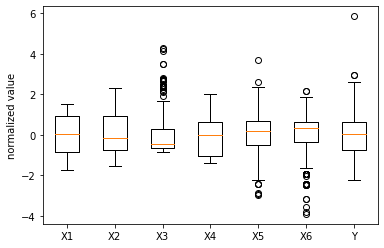

In [250]:
#box plot of each attribute
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.boxplot([dfs["X1"],dfs["X2"],dfs["X3"],dfs["X4"],dfs["X5"],dfs["X6"],dfs["Y"],], labels=ls_column)
ax.set_ylabel('normalized value')


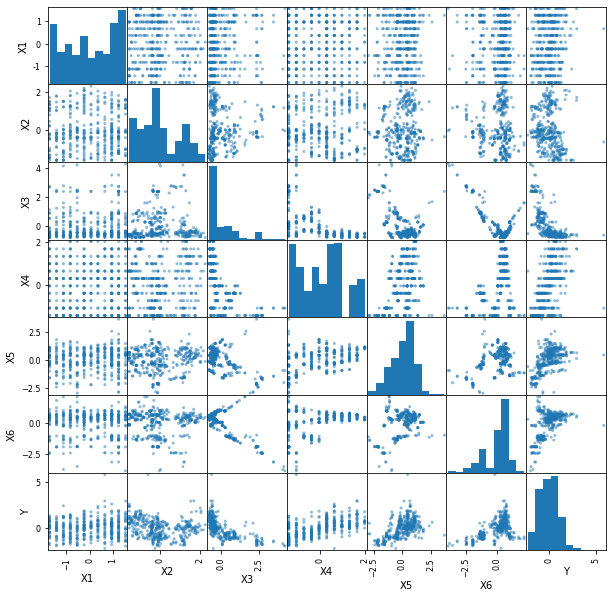

In [217]:
# figures showing the correlations
from pandas import plotting
plotting.scatter_matrix(dfs,figsize=(10, 10))
plt.show()

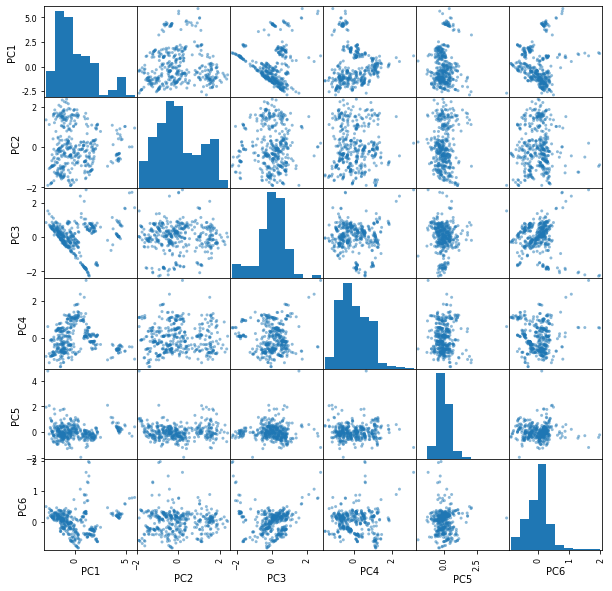

In [218]:
# figures showing the correlations using principal attributes
plotting.scatter_matrix(pd.DataFrame(feature2, 
                        columns=["PC{}".format(x + 1) for x in range(len(dfs2.columns))]), 
                        figsize=(10, 10), alpha=0.5) 
plt.show()

In [219]:
# dataframe of each principal attribute's contribution 
pd.DataFrame(pca.explained_variance_ratio_, index=["PC{}".format(x + 1) for x in range(len(dfs2.columns))])

,0
PC1,0.545166
PC2,0.177456
PC3,0.106149
PC4,0.092226
PC5,0.054602
PC6,0.024400


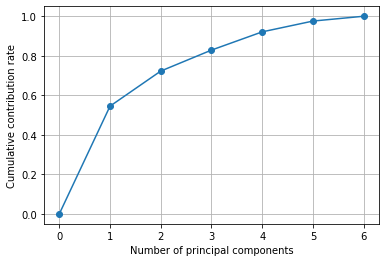

In [220]:
import matplotlib.ticker as ticker
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution rate")
plt.grid()
plt.show()

In [221]:
# projection of attributes X,Y onto principal attributes
pd.DataFrame(pca.components_,columns=ls_column[1:])

,X2,X3,X4,X5,X6,Y
0,0.038890,0.508331,-0.415384,-0.403116,-0.442217,-0.457695
1,0.950854,-0.032217,0.144264,0.164091,-0.014375,-0.216552
2,-0.071025,0.294020,0.270204,0.532437,-0.690720,0.273704
3,-0.014533,-0.080806,-0.755263,0.632407,0.125811,-0.084086
4,0.297375,0.032460,-0.388905,-0.326439,-0.103006,0.801308
5,0.026018,0.804071,0.109380,0.143463,0.548365,0.139794


In [222]:
pca.components_

array([[ 0.03888992,  0.50833087, -0.41538445, -0.40311587, -0.44221685,
        -0.45769523],
       [ 0.95085367, -0.03221723,  0.14426421,  0.16409133, -0.01437458,
        -0.2165516 ],
       [-0.07102499,  0.29401963,  0.27020417,  0.53243688, -0.69072047,
         0.27370387],
       [-0.01453323, -0.08080604, -0.75526284,  0.63240669,  0.12581118,
        -0.08408643],
       [ 0.29737547,  0.03246036, -0.38890531, -0.32643947, -0.10300602,
         0.80130758],
       [ 0.02601805,  0.80407148,  0.10938008,  0.14346304,  0.548365  ,
         0.13979377]])

Time is interval, therefore the normalization of time data and PCA containing its data are meaningless.
It may be possible to classfy data by some points of time or analze time trend of the other data, but for the data that we have it is impossible to do since each scatter plots whose one of the axis is time show no feature.

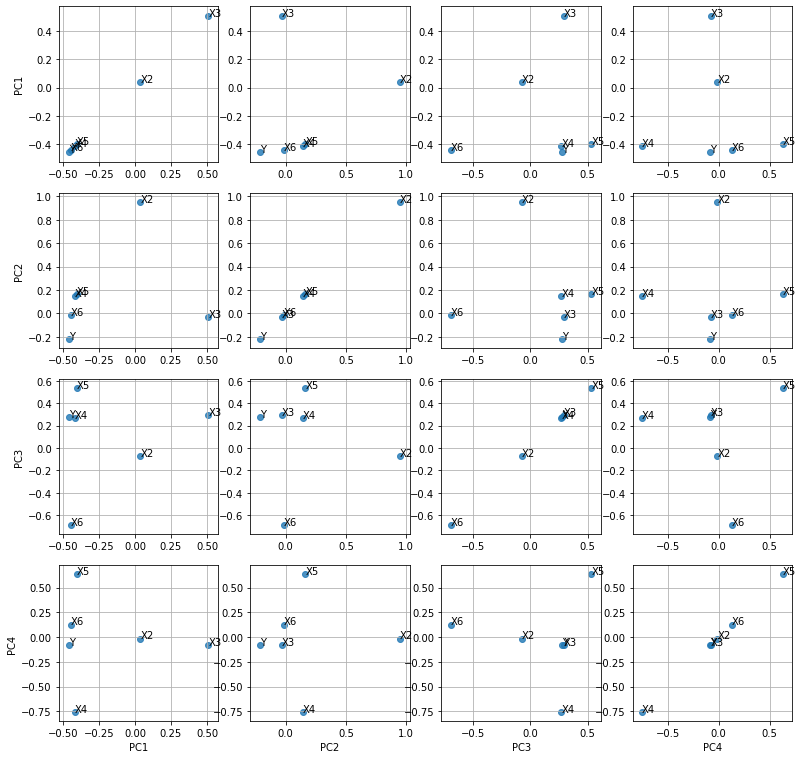

In [281]:
# plotting the above result onto 2 dimensional field
plt.figure(figsize=(20, 20))

for i in range(4):
    for j in range(4):
        plt.subplot(6,6,6*i+j+1)
        plt.scatter(pca.components_[j], pca.components_[i], alpha=0.8)
        
        for y, x, name in zip(pca.components_[i], pca.components_[j], ls_column[1:]):
            plt.text(x, y, name)
            
        if(i==3):
            plt.xlabel("PC{}".format(j+1))
        if(j==0):
            plt.ylabel("PC{}".format(i+1))
        
        plt.grid()